In [1]:
import os

import pandas as pd
import numpy as np
import itertools
import geopandas as gpd

from loading_utils import * 
from plotting_utils import * 
from plotting_utils import tech_colors_, color_groups_, scen_colors_

path_to_scenarios = '/Users/Guille/Desktop/single_node/scenarios'
path_to_images    = '/Users/Guille/Desktop/single_node/images/'

In [2]:
zone  = 'Tamil_Nadu'
zone_ = [zone]

scenarios_ = ['VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24',
              'VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24',
              'VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24']

scenario_labels_ = ['VRE & ST (low)',
                    'VRE & ST (mid)',
                    'VRE & ST (high)']

coal_        = ['Coal', ['Subcritical_Coal_Large', 'Subcritical_Coal_Small', 'Supercritical_Coal']]
natural_gas_ = ['Gas', ['CCGT', 'CT', 'Diesel']]
hydro_       = ['Hydro', ['Hydro_ROR', 'Hydro_Storage']]
pumped_      = ['Pumped Storage', ['Hydro_Pumped']]
wind_        = ['Wind', ['Wind', 'Offshore']]
solar_       = ['Solar', ['SolarPV_tilt', 'SolarPV_single']]
other_       = ['Other', ['Biomass', 'WHR']]
tech_groups_ = [coal_, natural_gas_, hydro_, pumped_, wind_, solar_, other_]

In [3]:
# Grab data and meta-data for plotting new and exisitng capacity graph
tech_capacity_   = _load_new_and_existing_capacity(scenarios_, zone_, path_to_scenarios)
capacity_groups_ = _group_capacity_technologies(tech_capacity_, tech_groups_)

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


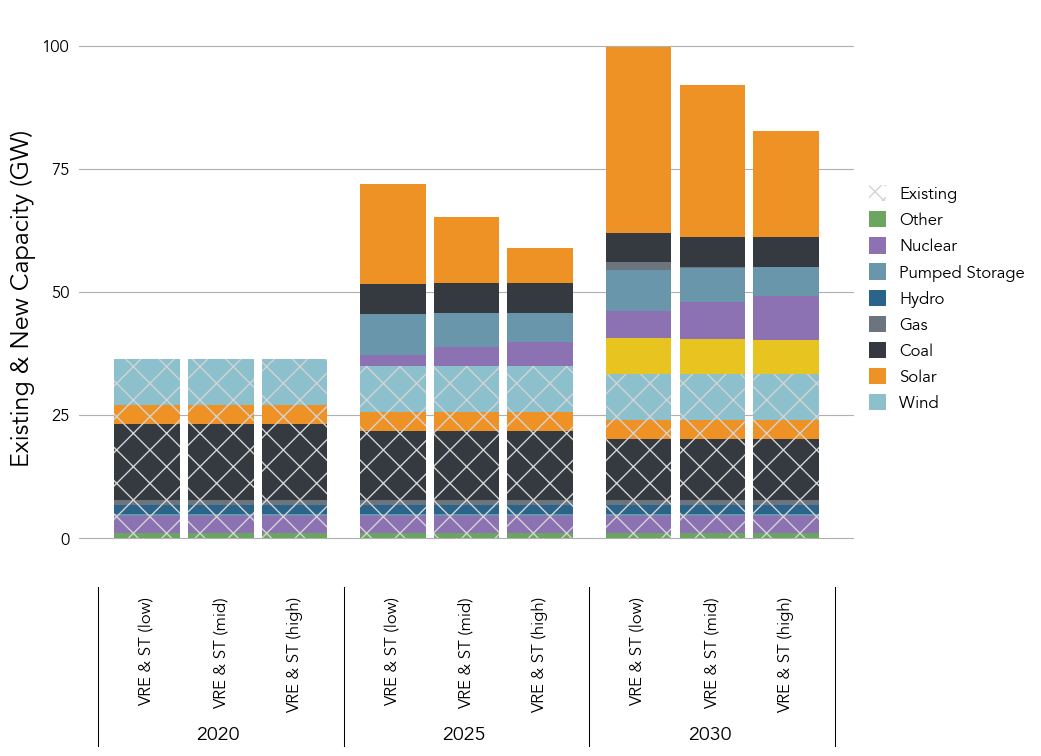

In [4]:
# Plot new and existing capacity for different scenarios
_plot_new_and_existing_capacity(capacity_groups_, scenarios_, scenario_labels_, color_groups_, zone, 
                                path         = path_to_images,                                                                  
                                y_period     = -41,
                                y_grid_inc   = 25,
                                div_line_len = -0.275,
                                save         = True, 
                                legend       = True,
                                title        = '',
                                file_name    = 'group_installed_capacity_{}.png'.format(zone))

In [5]:
# Grab data and meta-data for plotting new and exisitng capacity graph
emissions_, demands_ = _load_GHG_emissions(scenarios_, zone_, path = path_to_scenarios)
emissions_, demands_ = _GHG_emissions_intensity(emissions_, demands_)

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


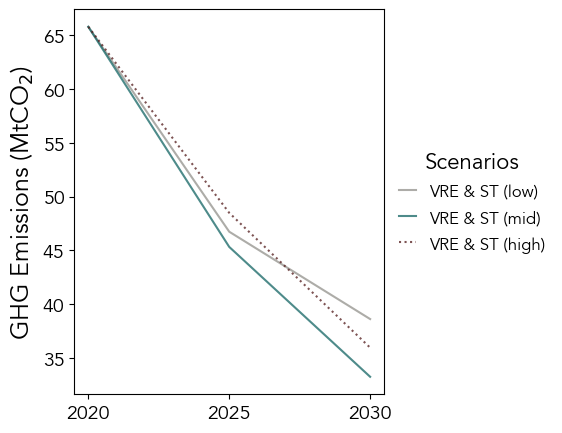

In [6]:
# Plot GHG emissions for different scenarios
_plot_emissions(emissions_, scenarios_, scenario_labels_, scen_colors_, zone, 
                path      = path_to_images, 
                save      = True,
                legend    = True,
                title     = '',
                file_name = 'GHG_emissions_{}.png'.format(zone))

In [7]:
# Grab data and meta-data for plotting LCOE graph
system_cost_ = _load_system_cost(scenarios_, zone_, path_to_scenarios, single_node = True)

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


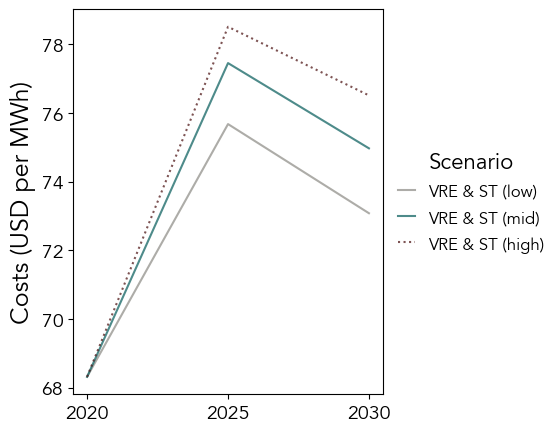

In [8]:
# Plot system cost for different scenarios
_plot_system_cost(system_cost_, scenarios_, scenario_labels_, scen_colors_, zone, 
                  path      = path_to_images,
                  save      = True,
                  legend    = True,
                  title     = '',
                  file_name = 'system_costs_{}.png'.format(zone))

In [9]:
Ed_        = _load_energy_dispatch(scenarios_, zone_, path_to_scenarios)
Ed_groups_ = _group_dispatch_technologies(Ed_, tech_groups_)

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


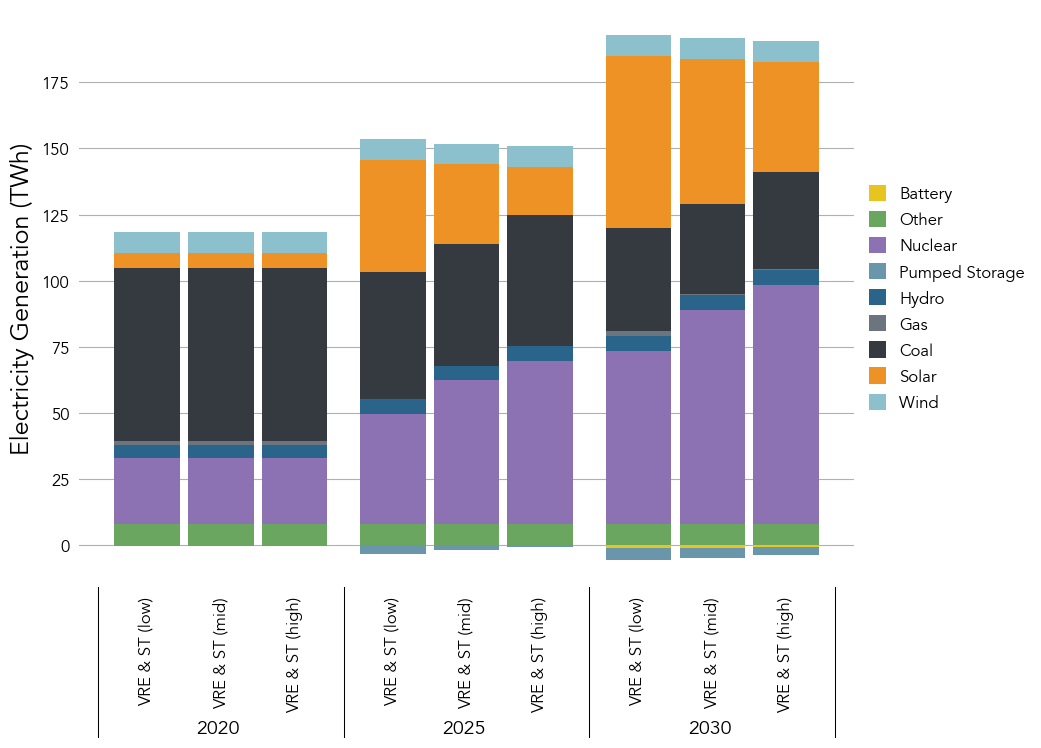

In [10]:
# Plot energy dispatch per technology for different scenarios
_plot_dispatch(Ed_groups_, scenarios_, scenario_labels_, color_groups_, zone, 
               path         = path_to_images, 
               y_period     = -71, 
               y_grid_inc   = 25,
               div_line_len = -.26,
               save         = True,
               legend       = True,
               title        = '',
               file_name    = 'group_{}_electricity_generation.png'.format(zone))